In [8]:
#CS 513: Knowledge Discovery and Data 
#Group Members: Danica Lacuesta, Joelle An, and Raj Rana 
#Author: Joelle An
#20015285
#"I pledge my honor that I have abided by the Stevens Honor System"
#Purpose: This project analyzes digital activity patterns to classify user stress levels and identify the behavioral features that most strongly impact predictive accuracy.

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# Import dataset
df = pd.read_csv("data/df_modified.csv")

df.head()


,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube
0,44,3.1,7.0,6.0,2.0,5.0,10.0,0,1,0,1,0,0,0,0,0
1,30,5.1,7.0,8.0,5.0,3.0,10.0,0,0,1,0,0,1,0,0,0
2,23,7.4,6.0,7.0,1.0,3.0,6.0,0,0,1,0,0,0,0,0,1
3,36,5.7,7.0,8.0,1.0,1.0,8.0,1,0,0,0,0,0,1,0,0
4,34,7.0,4.0,7.0,5.0,1.0,8.0,1,0,0,0,0,0,0,1,0


In [11]:
df['Stress_Binary'] = np.where(df['Stress_Level(1-10)'] >= 6, 1, 0)

X = df.drop(columns=['Stress_Level(1-10)', 'Stress_Binary'])
y = df['Stress_Binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
cart_model = DecisionTreeClassifier(random_state=42, max_depth=None)
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

accuracy = cart_model.score(X_test, y_test)
print(f"\nCART Model Test Accuracy: {accuracy:.3f}")

df.head()


CART Model Test Accuracy: 0.807


,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10),Gender_Female,Gender_Male,Gender_Other,Social_Media_Platform_Facebook,Social_Media_Platform_Instagram,Social_Media_Platform_LinkedIn,Social_Media_Platform_TikTok,Social_Media_Platform_X (Twitter),Social_Media_Platform_YouTube,Stress_Binary
0,44,3.1,7.0,6.0,2.0,5.0,10.0,0,1,0,1,0,0,0,0,0,1
1,30,5.1,7.0,8.0,5.0,3.0,10.0,0,0,1,0,0,1,0,0,0,1
2,23,7.4,6.0,7.0,1.0,3.0,6.0,0,0,1,0,0,0,0,0,1,1
3,36,5.7,7.0,8.0,1.0,1.0,8.0,1,0,0,0,0,0,1,0,0,1
4,34,7.0,4.0,7.0,5.0,1.0,8.0,1,0,0,0,0,0,0,1,0,1



Classification Report:
|                    | precision   | recall   | f1-score   |
|:-------------------|:------------|:---------|:-----------|
| Not Stressed (1-5) | 0.613       | 0.528    | 0.567      |
| Stressed (6-10)    | 0.857       | 0.895    | 0.876      |


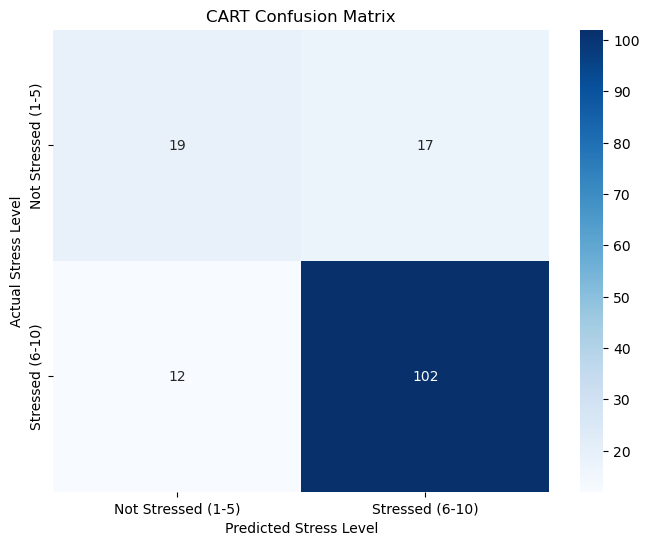

In [ ]:
class_names = ['Not Stressed (1-5)', 'Stressed (6-10)']

report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
report_df = pd.DataFrame(report).transpose()
rows_to_drop = ['macro avg', 'weighted avg']
report_df = report_df.drop(rows_to_drop, errors='ignore')
report_df = report_df.drop(columns=['support'])

print("\nClassification Report:")
print(report_df.to_markdown(numalign="left", stralign="left", floatfmt=".3f"))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix, 
    annot=True, 
    fmt='g', 
    cmap='Blues',
    xticklabels=class_names, 
    yticklabels=class_names,
    cbar=True  
)
plt.xlabel('Predicted Stress Level')
plt.ylabel('Actual Stress Level')
plt.title('CART Confusion Matrix')
plt.savefig('cart_confusion_matrix.png')
plt.show()
plt.close()


Area Under the ROC Curve (AUC): 0.711


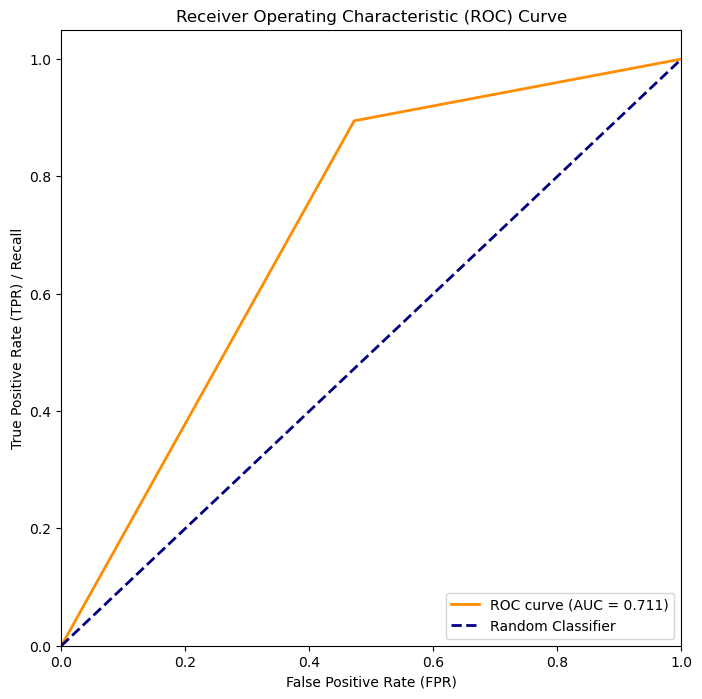

In [13]:
y_pred_proba = cart_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

print(f"\nArea Under the ROC Curve (AUC): {roc_auc:.3f}")

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier') # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR) / Recall')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.savefig('cart_roc_curve.png')
plt.show()
plt.close()

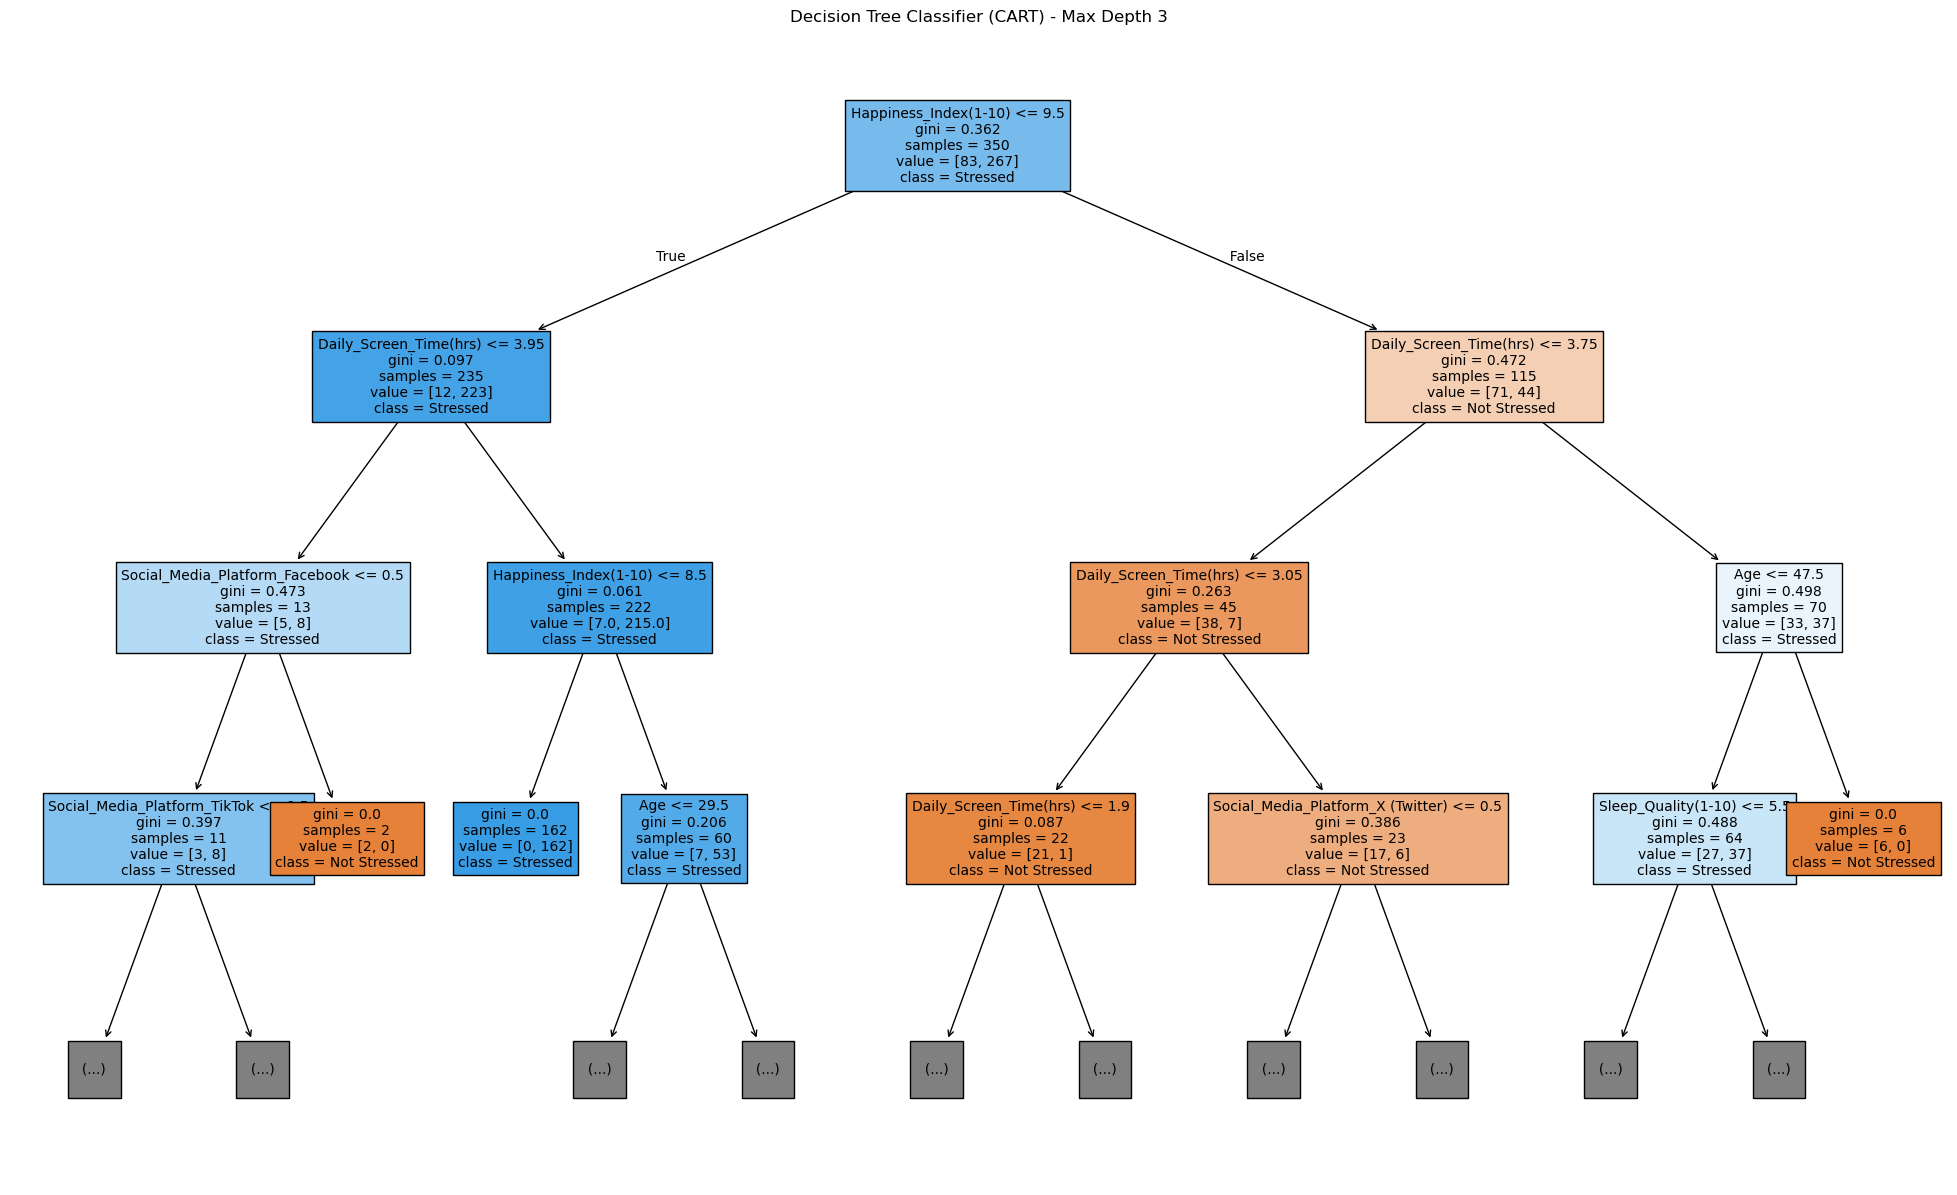

In [14]:
plt.figure(figsize=(25, 15))
plot_tree(
    cart_model, 
    feature_names=X.columns.tolist(), 
    class_names=['Not Stressed', 'Stressed'], 
    filled=True, 
    max_depth=3,  
    fontsize=10
)
plt.title('Decision Tree Classifier (CART) - Max Depth 3')
plt.savefig('cart_decision_tree_visualization.png')
plt.show()
plt.close()